In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


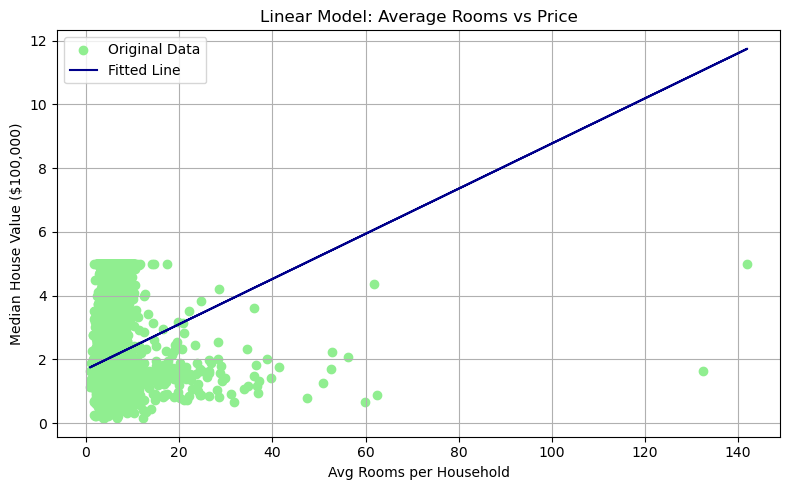

In [ ]:
# TASK 1
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

housing_data = fetch_california_housing()
features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
target_prices = housing_data.target

rooms_feature = features[['AveRooms']]

regressor = LinearRegression()
regressor.fit(rooms_feature, target_prices)

plt.figure(figsize=(8, 5))
plt.scatter(rooms_feature, target_prices, c='lightgreen', label='Original Data')
plt.plot(rooms_feature, regressor.predict(rooms_feature), c='darkblue', label='Fitted Line')
plt.title('Linear Model: Average Rooms vs Price')
plt.xlabel('Avg Rooms per Household')
plt.ylabel('Median House Value ($100,000)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# TASK 2
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

selected_columns = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
X_selected = features[selected_columns]
y_values = target_prices

mlr_model = LinearRegression()
mlr_model.fit(X_selected, y_values)
predicted_vals = mlr_model.predict(X_selected)

r_squared = r2_score(y_values, predicted_vals)
mse_val = mean_squared_error(y_values, predicted_vals)
rmse_val = np.sqrt(mse_val)

print("Evaluation Metrics for Multiple Linear Regression:")
print(f"R² Score: {r_squared:.4f}")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}\n")

print("Model Coefficients by Feature:")
for name, weight in zip(selected_columns, mlr_model.coef_):
    print(f"{name}: {weight:.4f}")


Evaluation Metrics for Multiple Linear Regression:
R² Score: 0.5137
MSE: 0.6475
RMSE: 0.8047

Model Coefficients by Feature:
MedInc: 0.4433
AveRooms: -0.0273
AveOccup: -0.0045
HouseAge: 0.0169


In [ ]:
# TASK 3
from sklearn.preprocessing import StandardScaler

dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = dataset.target

important_features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
X_input = df[important_features]

model_unscaled = LinearRegression()
model_unscaled.fit(X_input, target)
pred_unscaled = model_unscaled.predict(X_input)

r2_unscaled = r2_score(target, pred_unscaled)
mse_unscaled = mean_squared_error(target, pred_unscaled)
rmse_unscaled = np.sqrt(mse_unscaled)

standardizer = StandardScaler()
X_normalized = standardizer.fit_transform(X_input)

model_standardized = LinearRegression()
model_standardized.fit(X_normalized, target)
pred_scaled = model_standardized.predict(X_normalized)

r2_scaled = r2_score(target, pred_scaled)
mse_scaled = mean_squared_error(target, pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print("Performance Without Scaling:")
print(f"R² Score : {r2_unscaled:.4f}")
print(f"RMSE     : {rmse_unscaled:.4f}")

print("\nPerformance With Feature Scaling:")
print(f"R² Score : {r2_scaled:.4f}")
print(f"RMSE     : {rmse_scaled:.4f}")

print("\nCoefficients Without Scaling:")
for col, val in zip(important_features, model_unscaled.coef_):
    print(f"{col}: {val:.4f}")

print("\nCoefficients With Standardized Inputs:")
for col, val in zip(important_features, model_standardized.coef_):
    print(f"{col}: {val:.4f}")


Performance Without Scaling:
R² Score : 0.5137
RMSE     : 0.8047

Performance With Feature Scaling:
R² Score : 0.5137
RMSE     : 0.8047

Coefficients Without Scaling:
MedInc: 0.4433
AveRooms: -0.0273
AveOccup: -0.0045
HouseAge: 0.0169

Coefficients With Standardized Inputs:
MedInc: 0.8423
AveRooms: -0.0677
AveOccup: -0.0463
HouseAge: 0.2124


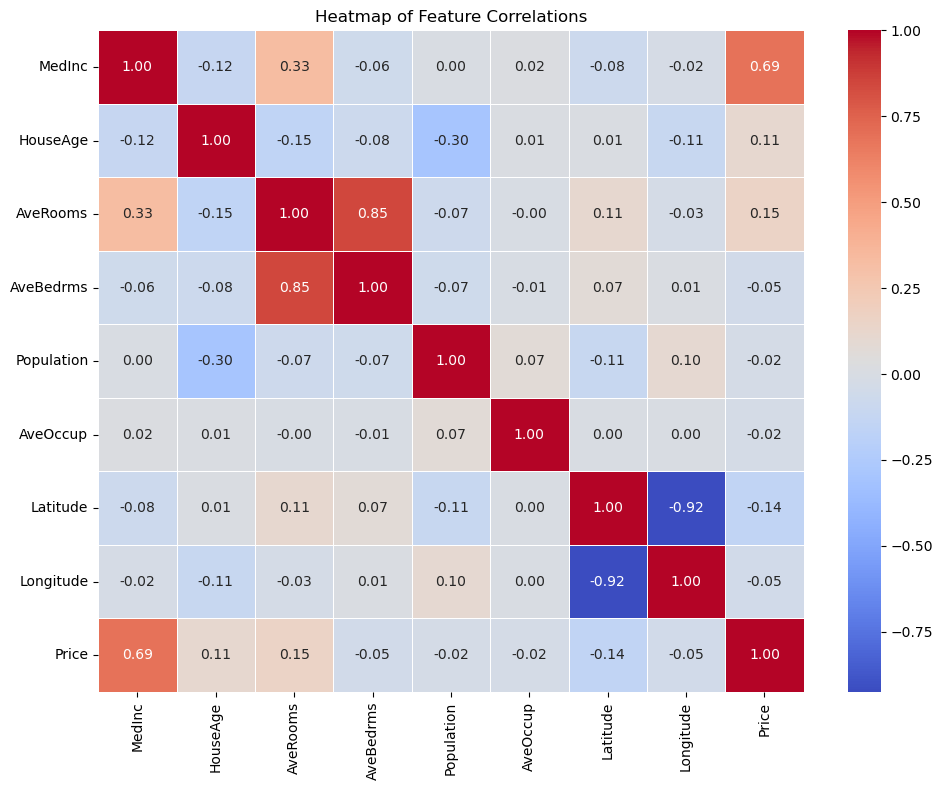


Top Correlated Features with Price:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


In [ ]:
# TASK 4
import seaborn as sns

housing = fetch_california_housing()
df_data = pd.DataFrame(housing.data, columns=housing.feature_names)
df_data['Price'] = housing.target

corr_matrix = df_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.tight_layout()
plt.show()

target_corr = corr_matrix['Price'].drop('Price').sort_values(ascending=False)
print("\nTop Correlated Features with Price:")
print(target_corr)
